## Modeling Contagion with Hypergraphs
This work is based on the paper [The effect of heterogeneity on hypergraph contagion models by Nicholas Landry](https://aip.scitation.org/doi/10.1063/5.0020034)
The SIS and SIR simulations will each take several minutes to run.

In [1]:
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import hypernetx.algorithms.contagion as contagion
from hnxwidget import HypernetxWidget

In [2]:
n = 1000 
m = 10000 

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList, static=True)

## Initialize simulation variables
- $\tau$ is a dictionary of the infection rate for each hyperedge size
- $\gamma$ is the healing rate
- $t_{max}$ is the time at which to terminate the simulation if it hasn't already
- $\Delta t$ is the time step size to use for the discrete time algorithm


In [3]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 0.1

## Run the SIR epidemic simulations
- The discrete SIR takes fixed steps in time and multiple infection/healing events can happen at each time step.
- The Gillespie SIR algorithm takes steps in time exponentially distributed and at each step forward, a single event occurs
- As $\Delta t\to 0$, the discrete time algorithm converges to the Gillespie algorithm. 

In [4]:
start = time.time()
t1, S1, I1, R1 = contagion.discrete_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax, dt=dt)
print(time.time() - start)
## ~153.8265552520752 sec

start = time.time()
t2, S2, I2, R2 = contagion.Gillespie_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax)
print(time.time() - start)
## ~135.4941120147705 sec

135.4941120147705


The Gillespie algorithm is much faster in many cases (and more accurate) than discrete-time algorithms because it doesn't consider events that don't happen. Instead, it calculates when the next event will occur and what event (infection, recovery, etc.) it will be.

## Plot of the results
- Dashed lines are the results from the discrete time algorithm
- Solid lines are the results from the Gillespie algorithm
- Plots of the numbers susceptible, infected, and recovered over time


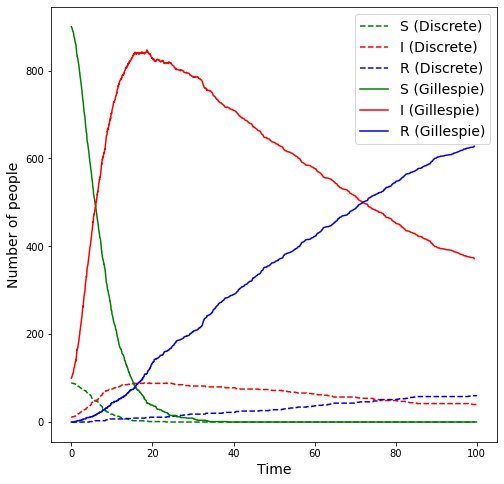

In [11]:
plt.figure()
plt.plot(t1, S1, 'g--', label='S (Discrete)')
plt.plot(t1, I1, 'r--', label='I (Discrete)')
plt.plot(t1, R1, 'b--', label='R (Discrete)')
plt.plot(t2, S2, 'g-', label='S (Gillespie)')
plt.plot(t2, I2, 'r-', label='I (Gillespie)')
plt.plot(t2, R2, 'b-', label='R (Gillespie)')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.legend(fontsize=14)
plt.show()

## SIS Model
In this model, once individuals heal, they may become re-infected.

In [5]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 1

In [6]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
start = time.time()
t1, S1, I1 = contagion.discrete_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax, dt=dt)
print(time.time() - start)
# ~598.4633498191833 sec

start = time.time()
t2, S2, I2 = contagion.Gillespie_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax)
print(time.time() - start)


# ~262.52834725379944 sec

598.4633498191833
262.52834725379944


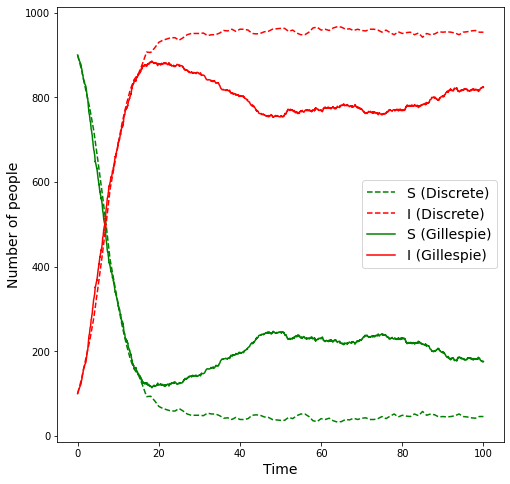

In [7]:
plt.figure()
plt.plot(t1, S1, 'g--', label='S (Discrete)')
plt.plot(t1, I1, 'r--', label='I (Discrete)')
plt.plot(t2, S2, 'g-', label='S (Gillespie)')
plt.plot(t2, I2, 'r-', label='I (Gillespie)')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Animation of SIR model

In [8]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import random
import time
import hypernetx.algorithms.contagion as contagion
import numpy as np
from IPython.display import HTML

In [9]:
n = 100
m = 40

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList, static=True)

In [10]:
tau = {2:2, 3:1}
gamma = 0.1

In [11]:
transition_events = contagion.discrete_SIR(H, tau, gamma, rho=0.2, tmin=0, tmax=50, dt=1, return_full_data=True)

In [12]:
for time, events in transition_events.items():
    if events != []:
        for event in events:
            if event[0] == 'R':
                print(f"At time {time}, {event[1]} recovered")
            elif event[0] == 'I' and event[2] is not None:
                print(f"At time {time}, {event[1]} was infected by {event[2]}")

At time 1, 66 was infected by e11
At time 1, 95 was infected by e1
At time 1, 52 was infected by e10
At time 1, 38 was infected by e6
At time 1, 92 was infected by e6
At time 1, 18 was infected by e7
At time 1, 20 was infected by e24
At time 1, 25 was infected by e10
At time 1, 0 recovered
At time 1, 29 was infected by e15
At time 1, 61 was infected by e37
At time 1, 32 was infected by e21
At time 1, 11 was infected by e28
At time 1, 69 was infected by e23
At time 1, 91 was infected by e23
At time 1, 63 was infected by e26
At time 1, 33 was infected by e28
At time 2, 72 was infected by e0
At time 2, 23 was infected by e20
At time 2, 34 was infected by e17
At time 2, 45 was infected by e4
At time 2, 83 was infected by e4
At time 2, 48 recovered
At time 2, 18 recovered
At time 2, 76 was infected by e9
At time 2, 53 was infected by e9
At time 2, 3 was infected by e13
At time 2, 37 was infected by e30
At time 2, 29 recovered
At time 2, 43 was infected by e22
At time 2, 4 was infected by e1

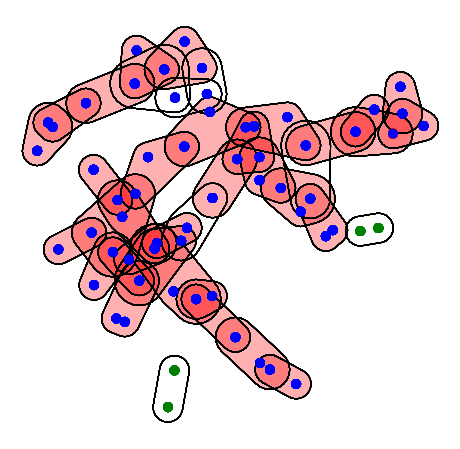

In [13]:
node_state_color_dict = {"S":"green", "I":"red", "R":"blue"}
edge_state_color_dict = {"S":(0, 1, 0, 0.3), "I":(1, 0, 0, 0.3), "R":(0, 0, 1, 0.3), "OFF": (1, 1, 1, 0)}

fps = 1

fig = plt.figure()
animation = contagion.contagion_animation(fig, H, transition_events, node_state_color_dict, edge_state_color_dict, node_radius=1, fps=fps)

In [14]:
HTML(animation.to_jshtml())

## Animation of the SIS model

In [15]:
transition_events = contagion.discrete_SIS(H, tau, gamma, rho=0.2, tmin=0, tmax=50, dt=1, return_full_data=True)

In [16]:
for time, events in transition_events.items():
    if events != []:
        for event in events:
            if event[0] == 'S':
                print(f"At time {time}, {event[1]} recovered")
            elif event[0] == 'I' and event[2] is not None:
                print(f"At time {time}, {event[1]} was infected by {event[2]}")

At time 1, 66 was infected by e0
At time 1, 54 was infected by e5
At time 1, 38 was infected by e33
At time 1, 18 was infected by e7
At time 1, 26 was infected by e8
At time 1, 7 was infected by e36
At time 1, 56 was infected by e16
At time 1, 4 was infected by e19
At time 1, 59 was infected by e19
At time 1, 21 was infected by e21
At time 1, 78 was infected by e22
At time 1, 11 was infected by e22
At time 1, 69 was infected by e23
At time 1, 91 was infected by e23
At time 1, 10 was infected by e25
At time 1, 80 was infected by e26
At time 1, 58 was infected by e27
At time 1, 33 was infected by e28
At time 1, 97 was infected by e37
At time 1, 81 was infected by e39
At time 1, 1 was infected by e33
At time 1, 36 was infected by e35
At time 1, 64 recovered
At time 2, 95 was infected by e31
At time 2, 23 was infected by e20
At time 2, 34 was infected by e17
At time 2, 48 was infected by e6
At time 2, 92 was infected by e6
At time 2, 85 recovered
At time 2, 20 was infected by e24
At time 2

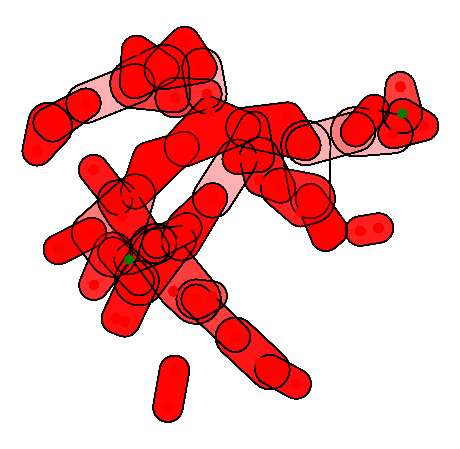

In [17]:
node_state_color_dict = {"S":"green", "I":"red", "R":"blue"}
edge_state_color_dict = {"S":(0, 1, 0, 0.3), "I":(1, 0, 0, 0.3), "R":(0, 0, 1, 0.3), "OFF": (1, 1, 1, 0)}

fps = 1

fig = plt.figure()
animation = contagion.contagion_animation(fig, H, transition_events, node_state_color_dict, edge_state_color_dict, node_radius=1, fps=fps)

In [18]:
HTML(animation.to_jshtml())